<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [10]:
import piplite
import pandas as pd
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd


We will import the following libraries for the lab


In [11]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [13]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [14]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [15]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [16]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [17]:
# Extract 'Class' as a Series and convert to NumPy array
Y = data['Class'].to_numpy()

# Quick check
print(Y[:10])
print(type(Y))  # should be <class 'numpy.ndarray'>


[0 0 0 0 0 0 1 1 0 0]
<class 'numpy.ndarray'>


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [18]:
# students get this 
from sklearn import preprocessing

# Standardize the data in X
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)  # X is now standardized


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [19]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

# Check the shape of the test set
print("Test set size:", X_test.shape)
print("Y_test shape:", Y_test.shape)


Test set size: (18, 83)
Y_test shape: (18,)


we can see we only have 18 test samples.


In [20]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [22]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Parameter grid
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create Logistic Regression object
lr = LogisticRegression()

# Create GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit to the training data
logreg_cv.fit(X_train, Y_train)

# Now you can access the best parameters and score
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy on validation data:", logreg_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data: 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


Accuracy on test data: 0.8333333333333334


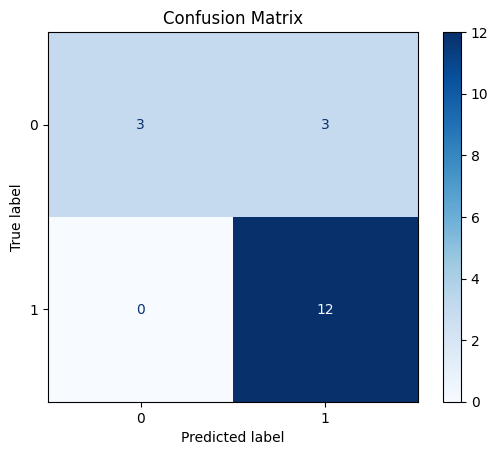

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict on the test data
yhat = logreg_cv.predict(X_test)

# Step 2: Calculate accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)

# Step 3: Plot the confusion matrix
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Lets look at the confusion matrix:


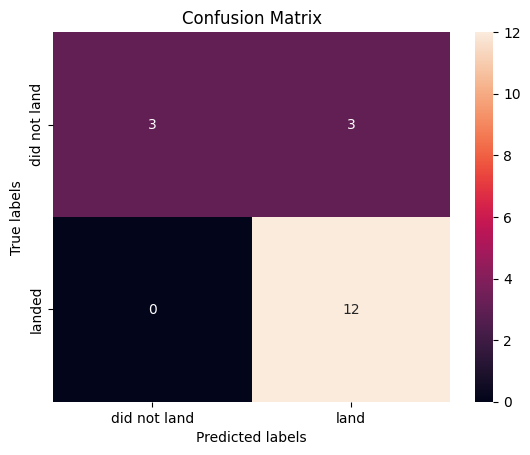

In [20]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


SVM Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
SVM CV Accuracy: 0.8482142857142858
SVM Test Accuracy: 0.8333333333333334


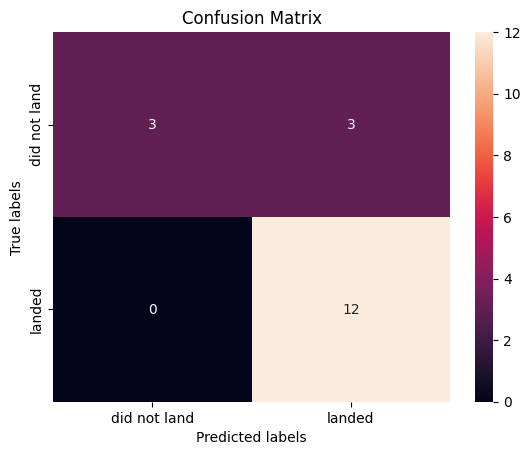

In [24]:
# ===============================
# Import Libraries
# ===============================
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ===============================
# Custom function to plot confusion matrix
# ===============================
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# ===============================
# Step 1: Define parameter grid
# ===============================
parameters_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}

# ===============================
# Step 2: Create SVM object & GridSearchCV
# ===============================
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters_svm, cv=10)

# ===============================
# Step 3: Fit to training data
# ===============================
svm_cv.fit(X_train, Y_train)

# ===============================
# Step 4: Best parameters & CV accuracy
# ===============================
print("SVM Best Parameters:", svm_cv.best_params_)
print("SVM CV Accuracy:", svm_cv.best_score_)

# ===============================
# Step 5: Predict on test set
# ===============================
yhat_svm = svm_cv.predict(X_test)

# ===============================
# Step 6: Test Accuracy
# ===============================
test_accuracy = accuracy_score(Y_test, yhat_svm)
print("SVM Test Accuracy:", test_accuracy)

# ===============================
# Step 7: Plot Confusion Matrix
# ===============================
plot_confusion_matrix(Y_test, yhat_svm)


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Step 1: Define the parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),      # 0.001, 0.01, 0.1, 1, 10, etc.
    'gamma': np.logspace(-3, 3, 5)
}

# Step 2: Create SVM object
svm = SVC()

# Step 3: Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Step 4: Fit GridSearchCV to the training data
svm_cv.fit(X_train, Y_train)

# Step 5: Print best parameters and validation accuracy
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy on validation data:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy on validation data: 0.8482142857142856


We can plot the confusion matrix


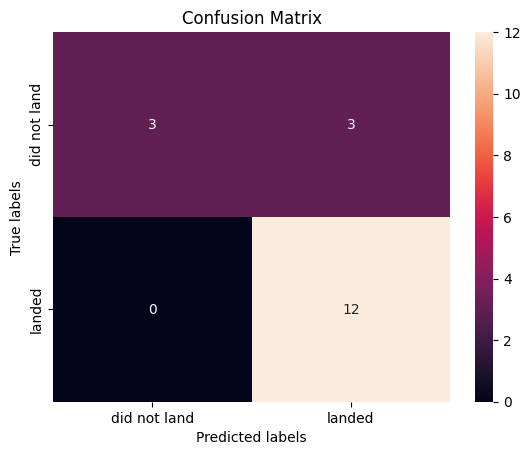

In [26]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [30]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [33]:
# ===============================
# Import Libraries
# ===============================
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# ===============================
# Step 1: Parameter grid (corrected max_features)
# ===============================
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],          # 2, 4, ..., 18
    'max_features': ['sqrt'],                           # 'auto' changed to 'sqrt'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# ===============================
# Step 2: Create Decision Tree object
# ===============================
tree = DecisionTreeClassifier()

# ===============================
# Step 3: Create GridSearchCV with 10-fold CV
# ===============================
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# ===============================
# Step 4: Fit GridSearchCV to training data
# ===============================
tree_cv.fit(X_train, Y_train)

# ===============================
# Step 5: Print best parameters & validation accuracy
# ===============================
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy on validation data:", tree_cv.best_score_)


Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy on validation data: 0.8892857142857145


In [34]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8892857142857145


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Accuracy on test data: 0.8333333333333334


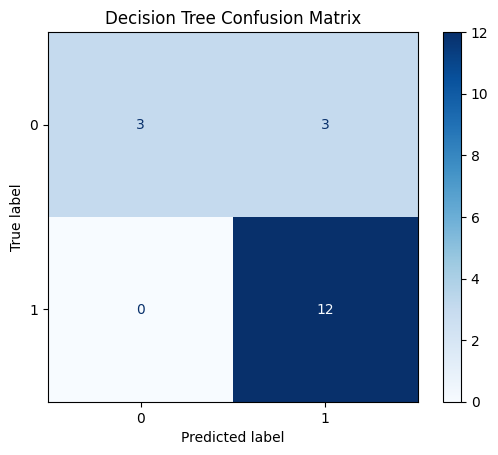

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict on the test data
yhat = tree_cv.predict(X_test)

# Step 2: Calculate test accuracy
test_accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)

# Step 3: Plot the confusion matrix
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()


We can plot the confusion matrix


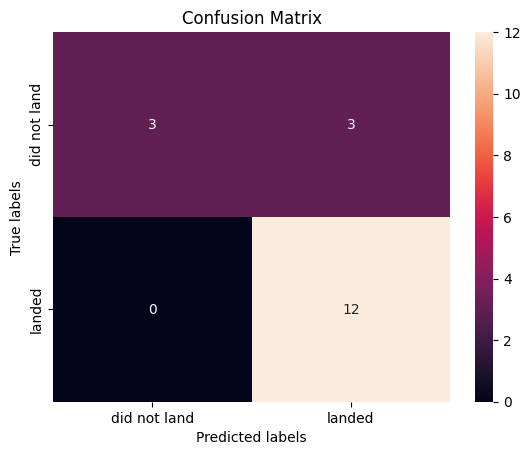

In [36]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [37]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],   # number of neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # search algorithm
    'p': [1, 2]  # 1 = Manhattan distance, 2 = Euclidean distance
}

# Step 2: Create KNN object
KNN = KNeighborsClassifier()

# Step 3: Create GridSearchCV object with 10-fold CV
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Step 4: Fit GridSearchCV to the training data
knn_cv.fit(X_train, Y_train)

# Step 5: Print best parameters and validation accuracy
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy on validation data:", knn_cv.best_score_)


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy on validation data: 0.8482142857142858


In [39]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [40]:
# Step 1: Predict on the test set (optional, but useful for confusion matrix)
yhat_knn = knn_cv.predict(X_test)

# Step 2: Calculate test accuracy
test_accuracy = knn_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)


Accuracy on test data: 0.8333333333333334


We can plot the confusion matrix


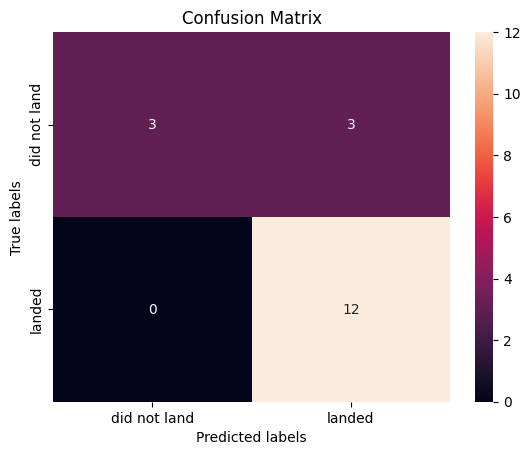

In [41]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [42]:
# Step 1: Predict on the test set for each model
yhat_lr = logreg_cv.predict(X_test)
yhat_svm = svm_cv.predict(X_test)
yhat_tree = tree_cv.predict(X_test)
yhat_knn = knn_cv.predict(X_test)

# Step 2: Calculate test accuracies
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(Y_test, yhat_lr)
acc_svm = accuracy_score(Y_test, yhat_svm)
acc_tree = accuracy_score(Y_test, yhat_tree)
acc_knn = accuracy_score(Y_test, yhat_knn)

# Step 3: Print test accuracies
print("Test Accuracy:")
print("Logistic Regression:", acc_lr)
print("SVM:", acc_svm)
print("Decision Tree:", acc_tree)
print("KNN:", acc_knn)

# Step 4: Identify the best performing model
best_model = max(
    [('Logistic Regression', acc_lr),
     ('SVM', acc_svm),
     ('Decision Tree', acc_tree),
     ('KNN', acc_knn)],
    key=lambda x: x[1]
)

print("\nBest performing model on test set:", best_model[0], "with accuracy:", best_model[1])


Test Accuracy:
Logistic Regression: 0.8333333333333334
SVM: 0.8333333333333334
Decision Tree: 0.8333333333333334
KNN: 0.8333333333333334

Best performing model on test set: Logistic Regression with accuracy: 0.8333333333333334


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
